In [1]:
# Importamos bibliotecas.

import pandas as pd
from inline_sql import sql, sql_val
import sqlite3

In [2]:
# Importamos los datasets que vamos a utilizar en este programa.

Migrantes = pd.read_csv("Tablas/TABLA. Migrantes - Diseño 2.csv")
Paises = pd.read_csv("Tablas/TABLA. Paises.csv")
Regiones = pd.read_csv("Tablas/TABLA. Regiones.csv")
Secciones = pd.read_csv("Tablas/TABLA. Secciones.csv")
Sedes = pd.read_csv("Tablas/TABLA. Sedes.csv")

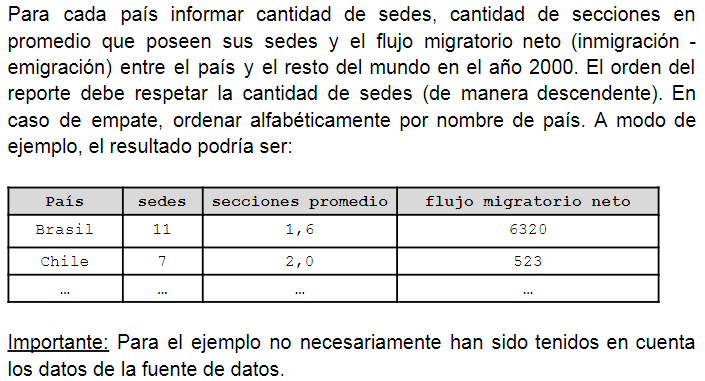

In [3]:
# Crear una conexión SQLite en memoria.
Connection = sqlite3.connect(':memory:')

In [4]:
# Cargar dfs en la base de datos SQLite.
Migrantes.to_sql('Migrantes', Connection, index=False, if_exists='replace')
Paises.to_sql('Paises', Connection, index=False, if_exists='replace')
Regiones.to_sql('Regiones', Connection, index=False, if_exists='replace')
Secciones.to_sql('Secciones', Connection, index=False, if_exists='replace')
Sedes.to_sql('Sedes', Connection, index=False, if_exists='replace')

164

In [5]:
Consulta_SQL = """
               SELECT P.nombre AS pais, 
                      COUNT(S.id) AS cantidad_sedes, 
                      COALESCE(AVG(CS.cant_secciones), 0) AS secciones_promedio,
                      COALESCE(M.neto_migratorio, 0) AS "flujo migratorio neto"
               FROM Paises AS P
               INNER JOIN Sedes AS S ON P.id = S.id_pais
               LEFT JOIN (
                            SELECT SC.id_sede, COUNT(SC.id_sede) AS cant_secciones
                            FROM Secciones AS SC
                            GROUP BY SC.id_sede
                         ) AS CS ON S.id = CS.id_sede
               LEFT JOIN (
                            SELECT id_pais, (inmigrantes - emigrantes) AS neto_migratorio
                            FROM Migrantes
                            WHERE anio = 2000
                          ) AS M ON P.id = M.id_pais
               GROUP BY P.nombre
               ORDER BY cantidad_sedes DESC, pais;
               
               """

SQL_1 = pd.read_sql_query(Consulta_SQL, Connection)
SQL_1

,pais,cantidad_sedes,secciones_promedio,flujo migratorio neto
0,Brazil,11,3.6,8871.0
1,United States,9,7.5,-122872.0
2,Uruguay,8,4.0,94023.0
3,Bolivia,7,8.0,209601.0
4,Chile,7,14.0,173391.0
...,...,...,...,...
86,Ukraine,1,4.0,9498.0
87,United Arab Emirates,1,3.0,0.0
88,"Venezuela, RB",1,5.0,-5665.0
89,Vietnam,1,4.0,0.0


In [6]:
SQL_1.to_csv('Tablas/TABLA. Ejercicio (a) de SQL.csv', index=False)